Our first WeatherCube tests went well and we're excited to look at the results. 

In [173]:
# import the python libraries for analysis
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [138]:
data = pd.read_table('data/dataforthefirstday/outsidetests1.txt', skiprows = 36, nrows= 7074, header = None, sep = ',',)
data.columns = ['id', 'raw_o3', 'raw_temp', 'raw_rh', 'adc_o3', 'adc_temp', 'adc_rh', 'day', 'hour', 'minute', 'second']
data.index = (pd.date_range('2017-03-24 10:00:00', periods = data.shape[0], freq = 'S'))

In [139]:
data.head()

,id,raw_o3,raw_temp,raw_rh,adc_o3,adc_temp,adc_rh,day,hour,minute,second
2017-03-24 10:00:00,111116030243,-106,6,29,32752,19848,18538,0,1,5,43
2017-03-24 10:00:01,111116030243,-93,6,29,32749,19856,18542,0,1,5,44
2017-03-24 10:00:02,111116030243,-111,6,29,32753,19856,18558,0,1,5,45
2017-03-24 10:00:03,111116030243,-111,6,29,32753,19856,18574,0,1,5,46
2017-03-24 10:00:04,111116030243,-62,6,29,32742,19856,18578,0,1,5,47


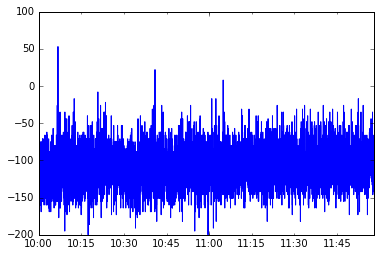

In [141]:
data['raw_o3'].plot()

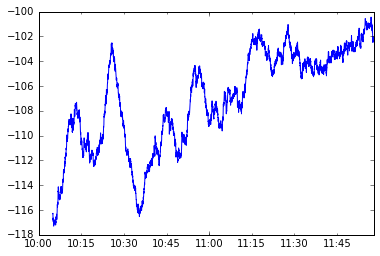

In [143]:
data['raw_o3'].rolling(60*5).mean().plot()

In [203]:
ozone1 = pd.read_table('data/firstweekendtest/usb1.txt', skiprows = 42, header = None, sep = ',',)
ozone1.columns = ['id', 'raw_o3', 'raw_temp', 'raw_rh', 'adc_o3', 'adc_temp', 'adc_rh', 'day', 'hour', 'minute', 'second']
ozone1.index = (pd.date_range('2017-03-26 01:00:00', periods = ozone1.shape[0], freq = 'S'))

In [204]:
ozone2 = pd.read_table('data/firstweekendtest/usb2.txt', skiprows = 42, header = None, sep = ',',)
ozone2.columns = ['id', 'raw_o3', 'raw_temp', 'raw_rh', 'adc_o3', 'adc_temp', 'adc_rh', 'day', 'hour', 'minute', 'second']
ozone2.index = (pd.date_range('2017-03-26 01:00:00', periods = ozone2.shape[0], freq = 'S'))

/Users/annascott2/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [206]:
nox1 = pd.read_table('data/firstweekendtest/usb0.txt', skiprows = 42,  header = None, sep = ',',)
nox1.columns = ['id', 'raw_no2', 'raw_temp', 'raw_rh', 'adc_o3', 'adc_temp', 'adc_rh', 'day', 'hour', 'minute', 'second']
nox1.index = (pd.date_range('2017-03-26 01:00:00', periods = nox1.shape[0], freq = 'S'))

In [207]:
nox2 = pd.read_table('data/firstweekendtest/usb3.txt', skiprows = 42, header = None, sep = ',',)
nox2.columns = ['id', 'raw_no2', 'raw_temp', 'raw_rh', 'adc_o3', 'adc_temp', 'adc_rh', 'day', 'hour', 'minute', 'second']
nox2.index = (pd.date_range('2017-03-26 01:00:00', periods = nox2.shape[0], freq = 'S'))

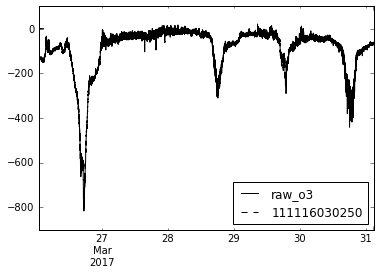

In [174]:
ozone1['raw_o3'].rolling(60).mean().plot(style = 'k' , label = ozone1['id'][0])
ozone2['raw_o3'].rolling(60).mean().plot(style = '--k', label = ozone2['id'][0])
plt.legend(loc=4)

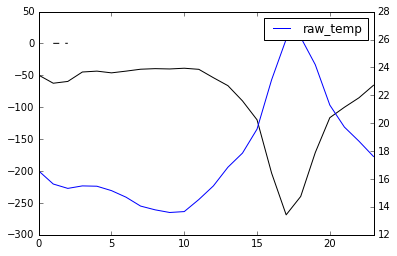

In [189]:
ozone1['raw_o3'].groupby(ozone1.index.hour).mean().plot(style = 'k' , label = ozone1['id'][0])
ozone1['raw_temp'].groupby(ozone1.index.hour).mean().plot(secondary_y = True)
ozone2['raw_o3'].groupby(ozone2.index.hour).mean().plot(style = '--k', label = ozone2['id'][0])
plt.legend()

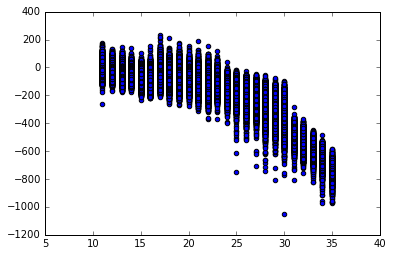

In [190]:
plt.scatter(ozone1['raw_temp'], ozone1['raw_o3'])

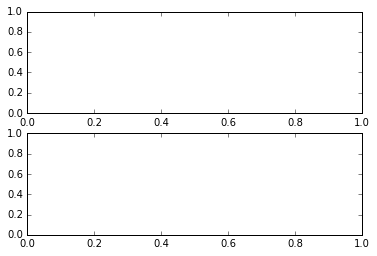

In [232]:
fig, axes = plt.subplots(2,1)

In [237]:
ax.legend(loc=4)
ax.set_title('First NO2 data')
ax.set_yticklabels([''])

In [241]:
axes[1].set_title('First O3 data')
axes[1].set_yticklabels([''])

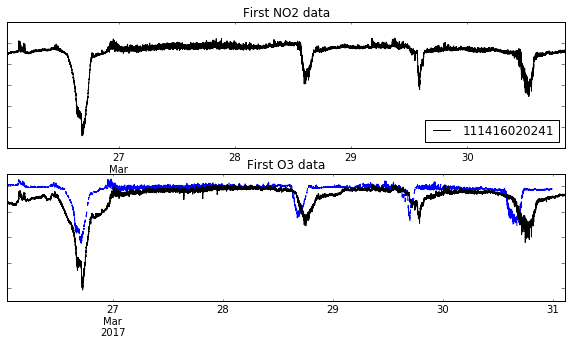

In [243]:
fig, axes = plt.subplots(2,1)
ax = nox1['raw_no2'].rolling(60).mean().plot(style = 'k' , label = nox1['id'][0], ax = axes[0], figsize = [10,5])
nox2['raw_no2'].rolling(60).mean().plot(style = '--b', label = nox2['id'][0])
axes[0].legend(loc=4)
axes[0].set_title('First NO2 data')
axes[0].set_yticklabels([''])

ozone1['raw_o3'].rolling(60).mean().plot(style = 'k' , label = ozone1['id'][0], ax = axes[1], figsize = [10,5])
axes[1].set_title('First O3 data')
axes[1].set_yticklabels([''])

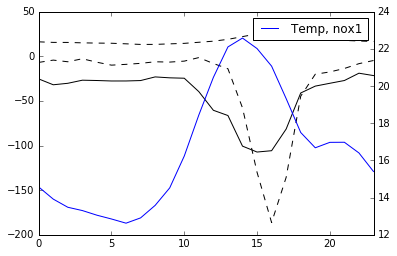

In [209]:
nox1['raw_no2'].groupby(nox1.index.hour).mean().plot(style = 'k' , label = nox1['id'][0])
nox1['raw_temp'].groupby(nox1.index.hour).mean().plot(secondary_y = True, label = 'Temp, nox1')
nox2['raw_no2'].groupby(nox2.index.hour).mean().plot(style = '--k', label = nox2['id'][0])
nox2['raw_temp'].groupby(nox2.index.hour).mean().plot(style = '--k', label = 'Temp, nox2')

plt.legend()

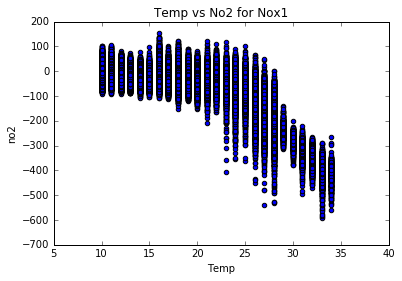

In [211]:
plt.scatter(nox1['raw_temp'], nox1['raw_no2'])
plt.title('Temp vs No2 for Nox1')
plt.xlabel('Temp')
plt.ylabel('no2')

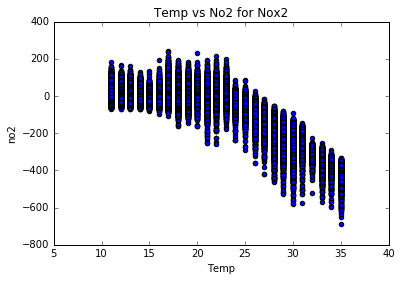

In [212]:
plt.scatter(nox2['raw_temp'], nox2['raw_no2'])
plt.title('Temp vs No2 for Nox2')
plt.xlabel('Temp')
plt.ylabel('no2')

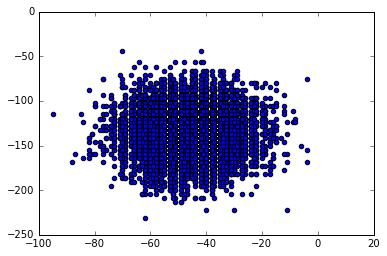

In [221]:
plt.scatter(nox1['raw_no2'].loc[ozone1.index][0:8000], 
            ozone1['raw_o3'].loc[ozone1.index][0:8000])

In [222]:
nox1.shape

(414874, 11)

In [224]:
nox1.index

DatetimeIndex(['2017-03-26 01:00:00', '2017-03-26 01:00:01',
               '2017-03-26 01:00:02', '2017-03-26 01:00:03',
               '2017-03-26 01:00:04', '2017-03-26 01:00:05',
               '2017-03-26 01:00:06', '2017-03-26 01:00:07',
               '2017-03-26 01:00:08', '2017-03-26 01:00:09',
               ...
               '2017-03-30 20:14:24', '2017-03-30 20:14:25',
               '2017-03-30 20:14:26', '2017-03-30 20:14:27',
               '2017-03-30 20:14:28', '2017-03-30 20:14:29',
               '2017-03-30 20:14:30', '2017-03-30 20:14:31',
               '2017-03-30 20:14:32', '2017-03-30 20:14:33'],
              dtype='datetime64[ns]', length=414874, freq='S')

In [223]:
nox2.shape

(427681, 11)

In [ ]:
nox1.index

In [199]:
nox1['raw_no2'].groupby(nox1.index.hour).mean()

1   -49.009444
2   -44.464882
Name: raw_no2, dtype: float64

In [245]:
ozone1.head()

,id,raw_o3,raw_temp,raw_rh,adc_o3,adc_temp,adc_rh,day,hour,minute,second
2017-03-26 01:00:00,111116030243,-106.0,15.0,32.0,32752.0,23288.0,20218.0,0.0,0.0,8.0,58.0
2017-03-26 01:00:01,111116030243,-124.0,15.0,32.0,32756.0,23288.0,20206.0,0.0,0.0,8.0,59.0
2017-03-26 01:00:02,111116030243,-80.0,15.0,32.0,32746.0,23288.0,20210.0,0.0,0.0,9.0,0.0
2017-03-26 01:00:03,111116030243,-120.0,15.0,32.0,32755.0,23288.0,20210.0,0.0,0.0,9.0,1.0
2017-03-26 01:00:04,111116030243,-142.0,15.0,32.0,32760.0,23276.0,20202.0,0.0,0.0,9.0,2.0


In [247]:
nox2.head()

,id,raw_no2,raw_temp,raw_rh,adc_o3,adc_temp,adc_rh,day,hour,minute,second
2017-03-26 01:00:00,111416020137,17,15,32,32734,23264.0,20098.0,0.0,0.0,9.0,11.0
2017-03-26 01:00:01,111416020137,9,15,32,32739,23272.0,20090.0,0.0,0.0,9.0,12.0
2017-03-26 01:00:02,111416020137,11,15,32,32738,23268.0,20086.0,0.0,0.0,9.0,13.0
2017-03-26 01:00:03,111416020137,9,15,32,32739,23272.0,20094.0,0.0,0.0,9.0,14.0
2017-03-26 01:00:04,111416020137,1,15,32,32745,23272.0,20090.0,0.0,0.0,9.0,15.0


In [248]:
ozone1.rolling

,id,raw_o3,raw_temp,raw_rh,adc_o3,adc_temp,adc_rh,day,hour,minute,second
2017-03-26 01:00:00,111116030243,-106.0,15.0,32.0,32752.0,23288.0,20218.0,0.0,0.0,8.0,58.0
2017-03-26 01:00:01,111116030243,-124.0,15.0,32.0,32756.0,23288.0,20206.0,0.0,0.0,8.0,59.0
2017-03-26 01:00:02,111116030243,-80.0,15.0,32.0,32746.0,23288.0,20210.0,0.0,0.0,9.0,0.0
2017-03-26 01:00:03,111116030243,-120.0,15.0,32.0,32755.0,23288.0,20210.0,0.0,0.0,9.0,1.0
2017-03-26 01:00:04,111116030243,-142.0,15.0,32.0,32760.0,23276.0,20202.0,0.0,0.0,9.0,2.0


In [254]:
m = 5
df = pd.DataFrame()
df['nox'] = nox2['raw_no2'].rolling(60*m).mean()
df['o3']  = ozone1['raw_o3'].rolling(60*m).mean()
df['temp'] = nox2['raw_temp'].rolling(60*m).mean()
df['rh'] = nox2['raw_rh'].rolling(60*m).mean()

In [255]:
import statsmodels.formula.api as sm

result = sm.ols(formula="o3 ~ nox + temp+ rh", data=df).fit()
print(result.params)
print(result.summary())

Intercept   -186.501656
nox            0.537429
temp          -3.991569
rh             3.976821
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     o3   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                 2.571e+05
Date:                Wed, 05 Apr 2017   Prob (F-statistic):               0.00
Time:                        08:25:11   Log-Likelihood:            -2.3898e+06
No. Observations:              427382   AIC:                         4.780e+06
Df Residuals:                  427378   BIC:                         4.780e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------

In [256]:
result = sm.ols(formula="nox ~ o3 + temp+ rh", data=df).fit()
print(result.params)
print(result.summary())

Intercept    93.812302
o3            0.233213
temp         -5.771678
rh           -0.034971
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 2.201e+05
Date:                Wed, 05 Apr 2017   Prob (F-statistic):               0.00
Time:                        08:25:55   Log-Likelihood:            -2.2114e+06
No. Observations:              427382   AIC:                         4.423e+06
Df Residuals:                  427378   BIC:                         4.423e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------